In [788]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install seaborn
# !pip install matplotlib

In [789]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, roc_auc_score, roc_curve

In [790]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [791]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [792]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [793]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [794]:
for i in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train_data[i].fillna(train_data[i].mean(), inplace=True)
    test_data[i].fillna(train_data[i].mean(), inplace=True)
for i in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'VRDeck']:
    train_data[i].fillna(train_data[i].mode()[0], inplace=True)
    test_data[i].fillna(train_data[i].mode()[0], inplace=True)
print(train_data.isna().sum(), test_data.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64 PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64


C:\Users\nikse\AppData\Local\Temp\ipykernel_5304\4241523042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[i].fillna(train_data[i].mean(), inplace=True)
C:\Users\nikse\AppData\Local\Temp\ipykernel_5304\4241523042.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [795]:
for i in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']:
    train_data[i].unique()

In [796]:
train_data['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2}, inplace=True)
train_data['CryoSleep'].replace({'False': 0, 'True': 1}, inplace=True)
train_data['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, inplace=True)
train_data['VIP'].replace({'False': 0, 'True': 1}, inplace=True)

C:\Users\nikse\AppData\Local\Temp\ipykernel_5304\1907065261.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2}, inplace=True)
C:\Users\nikse\AppData\Local\Temp\ipykernel_5304\1907065261.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, inplace=True)


In [797]:
test_data['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2}, inplace=True)
test_data['CryoSleep'].replace({'False': 0, 'True': 1}, inplace=True)
test_data['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, inplace=True)
test_data['VIP'].replace({'False': 0, 'True': 1}, inplace=True)

C:\Users\nikse\AppData\Local\Temp\ipykernel_5304\4211560964.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2}, inplace=True)
C:\Users\nikse\AppData\Local\Temp\ipykernel_5304\4211560964.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}, inplace=True)


In [798]:
x = train_data.drop(columns= ['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1)
passenger_ids_test = test_data['PassengerId']
test_data = test_data.drop(columns= ['PassengerId', 'Cabin', 'Name'], axis=1)
y = train_data['Transported']
print(x.shape, y.shape, test_data.shape)

(8693, 10) (8693,) (4277, 11)


In [799]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)
test_data_s = scaler.transform(test_data)
x_s[:5]

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PassengerId


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_s, y, test_size=0.5)
print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

In [ ]:
model = RandomForestClassifier(random_state = 0, oob_score = True)
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
y_pred[:10]

In [800]:
model.oob_score_

0.7799827437446074

In [801]:
y_val_pred = model.predict_proba(x_val)
y_val_pred[:10]

array([[0.23      , 0.77      ],
       [0.38      , 0.62      ],
       [0.50083333, 0.49916667],
       [0.95      , 0.05      ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [0.7       , 0.3       ],
       [0.13      , 0.87      ],
       [0.9       , 0.1       ],
       [0.18      , 0.82      ]])

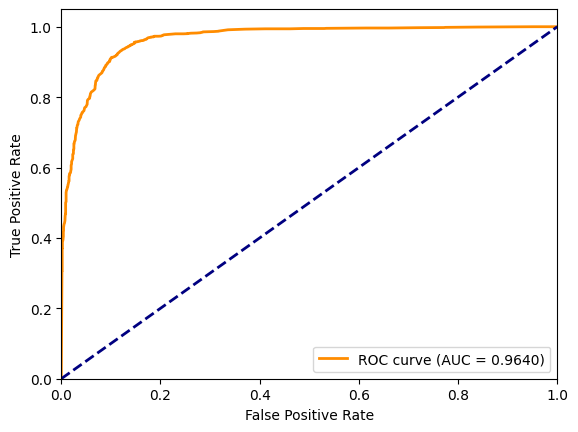

In [802]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred[:, 1])
roc_auc = roc_auc_score(y_val, y_val_pred[:, 1])
                                 
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

In [803]:
model2 = RandomForestClassifier(random_state=0, oob_score = True)
params = { 
    'max_depth': [2,3,4,5],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [200, 400, 600]
}
grid_search_CV = GridSearchCV(estimator=model2, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search_CV.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [200, 400, 600]},
             scoring='accuracy', verbose=1)

In [804]:
grid_search_CV.best_score_

0.7854472246189244

In [805]:
best_model = grid_search_CV.best_estimator_
best_model

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=600,
                       oob_score=True, random_state=0)

In [806]:
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=600,
                       oob_score=True, random_state=0)

In [807]:
y_val_pred = best_model.predict_proba(x_val)
y_val_pred[:10]

array([[0.78627181, 0.21372819],
       [0.85657676, 0.14342324],
       [0.2397727 , 0.7602273 ],
       [0.48845601, 0.51154399],
       [0.04533055, 0.95466945],
       [0.80119882, 0.19880118],
       [0.54186117, 0.45813883],
       [0.42421813, 0.57578187],
       [0.73931281, 0.26068719],
       [0.47122272, 0.52877728]])

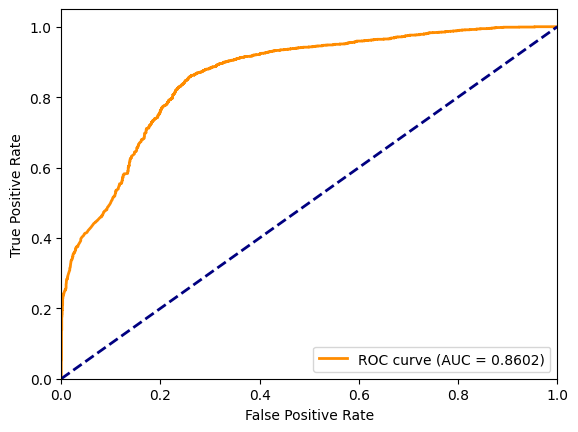

In [808]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred[:, 1])
roc_auc = roc_auc_score(y_val, y_val_pred[:, 1])
                                 
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

In [809]:
sub_pred = best_model.predict(test_data_s)

df = pd.DataFrame({'PassengerId': passenger_ids_test.values,
                  'Transported': sub_pred})

In [810]:
df.to_csv('submission.csv', index=False)